<h1 style="color:rgb(0,120,170)">Neural Networks and Deep Learning</h1>
<h2 style="color:rgb(0,120,170)">Intro to Tensor Flow and Keras - simple model</h2>


! pip install -U tensorflow tensorboard

In [1]:
import os
import sys
import re
import time
import datetime
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorboard.plugins.hparams import api_pb2
from tensorboard.plugins.hparams import summary as hparams_summary
%load_ext tensorboard

from google.protobuf import struct_pb2

In [2]:
print(tf.__version__)
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)
print(physical_devices)

2.4.1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

First we'll develop a small ANN with Keras:

In [4]:
# load pima indians dataset
dataset = np.loadtxt("../../../data/pima-indians-diabetes.csv", delimiter=",")

In [5]:
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [6]:
#https://www.tensorflow.org/api_docs/python/tf/keras/layers
#https://www.tensorflow.org/api_docs/python/tf/keras/activations
#https://www.tensorflow.org/api_docs/python/tf/keras/initializers
#https://www.tensorflow.org/api_docs/python/tf/keras/losses
#https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
#https://www.tensorflow.org/api_docs/python/tf/keras/metrics

# create model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(12, input_dim=8, activation="relu", kernel_initializer="uniform"))
model.add(tf.keras.layers.Dense(8, activation="relu", kernel_initializer="uniform"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid", kernel_initializer="uniform"))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=200, batch_size=10, verbose=1)

Epoch 1/200
52/52 [==============================] - 1s 7ms/step - loss: 0.6861 - accuracy: 0.6486 - val_loss: 0.6652 - val_accuracy: 0.6732
Epoch 2/200
52/52 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.6182 - val_loss: 0.6520 - val_accuracy: 0.6732
Epoch 3/200
52/52 [==============================] - 0s 2ms/step - loss: 0.6686 - accuracy: 0.6241 - val_loss: 0.6451 - val_accuracy: 0.6732
Epoch 4/200
52/52 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.6359 - val_loss: 0.6370 - val_accuracy: 0.6732
Epoch 5/200
52/52 [==============================] - 0s 2ms/step - loss: 0.6476 - accuracy: 0.6234 - val_loss: 0.6345 - val_accuracy: 0.6732
Epoch 6/200
52/52 [==============================] - 0s 2ms/step - loss: 0.6598 - accuracy: 0.6330 - val_loss: 0.6190 - val_accuracy: 0.7008
Epoch 7/200
52/52 [==============================] - 0s 2ms/step - loss: 0.6337 - accuracy: 0.6753 - val_loss: 0.6124 - val_accuracy: 0.6732
Epoch 8/200
5

In [8]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


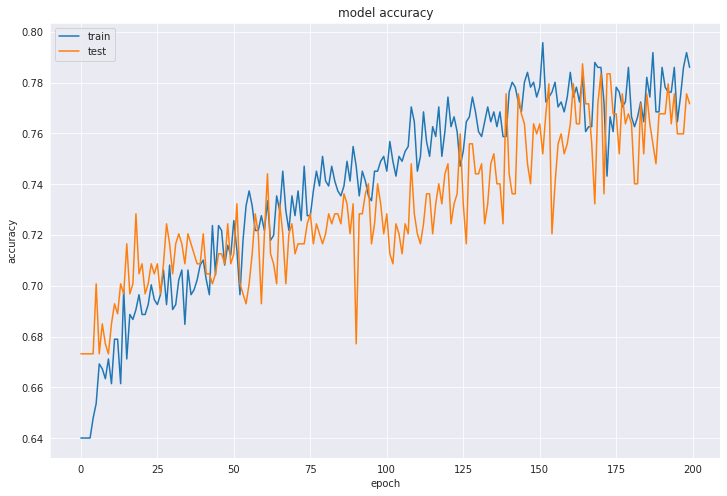

In [9]:
# summarize history for accuracy
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

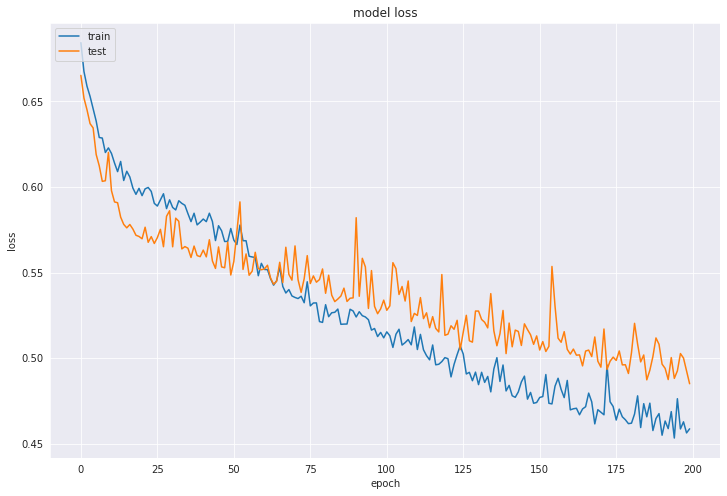

In [10]:
# summarize history for loss
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
# evaluate the model
scores = model.evaluate(X, Y)
print("\n{}: {}".format(model.metrics_names[1], scores[1]*100))

24/24 [==============================] - 0s 966us/step - loss: 0.4561 - accuracy: 0.7839

accuracy: 78.38541865348816


In [12]:
# calculate predictions
predictions = model.predict(X)
rounded = [round(x[0]) for x in predictions]

for pred in list(zip(predictions[0:10], rounded[0:10])):
    print(pred)

(array([0.56339705], dtype=float32), 1)
(array([0.04467709], dtype=float32), 0)
(array([0.8889764], dtype=float32), 1)
(array([0.07030087], dtype=float32), 0)
(array([0.60314715], dtype=float32), 1)
(array([0.17835522], dtype=float32), 0)
(array([0.10553515], dtype=float32), 0)
(array([0.7601163], dtype=float32), 1)
(array([0.98532015], dtype=float32), 1)
(array([0.35000739], dtype=float32), 0)
